In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pandas

In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/HR Data.csv')

In [5]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [6]:
print(df.tail())

      Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80

In [7]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [8]:
print("\nColumn Names in the Dataset:")
print(df.columns)


Column Names in the Dataset:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/drive/MyDrive/HR Data.csv'
hr_data = pd.read_csv(file_path)


Step 1: Remove unnecessary columns

In [13]:
columns_to_remove = ['EmployeeCount', 'StandardHours', 'EmployeeNumber']
hr_data_cleaned = hr_data.drop(columns=columns_to_remove)

Step 2:Rename columns

In [14]:

columns_rename = {
    'Age': 'age',
    'Attrition': 'attrition',
    'BusinessTravel': 'business_travel',
    'DailyRate': 'daily_rate',
    'Department': 'department',
    'DistanceFromHome': 'distance_from_home',
    'Education': 'education',
    'EducationField': 'education_field',
    'EnvironmentSatisfaction': 'environment_satisfaction',
    'Gender': 'gender',
    'HourlyRate': 'hourly_rate',
    'JobInvolvement': 'job_involvement',
    'JobLevel': 'job_level',
    'JobRole': 'job_role',
    'JobSatisfaction': 'job_satisfaction',
    'MaritalStatus': 'marital_status',
    'MonthlyIncome': 'monthly_income',
    'MonthlyRate': 'monthly_rate',
    'NumCompaniesWorked': 'num_companies_worked',
    'Over18': 'over_18',
    'OverTime': 'over_time',
    'PercentSalaryHike': 'percent_salary_hike',
    'PerformanceRating': 'performance_rating',
    'RelationshipSatisfaction': 'relationship_satisfaction',
    'StockOptionLevel': 'stock_option_level',
    'TotalWorkingYears': 'total_working_years',
    'TrainingTimesLastYear': 'training_times_last_year',
    'WorkLifeBalance': 'work_life_balance',
    'YearsAtCompany': 'years_at_company',
    'YearsInCurrentRole': 'years_in_current_role',
    'YearsSinceLastPromotion': 'years_since_last_promotion',
    'YearsWithCurrManager': 'years_with_current_manager'
}
hr_data_cleaned.rename(columns=columns_rename, inplace=True)

Step 3: Eliminate redundant entries

In [15]:
hr_data_cleaned.drop_duplicates(inplace=True)

 Step 4: Sanitize specific columns
Convert columns to appropriate data types if necessary

In [16]:
categorical_columns = ['attrition', 'business_travel', 'department', 'education_field', 'gender', 'job_role', 'marital_status', 'over_18', 'over_time']
for col in categorical_columns:
    hr_data_cleaned[col] = hr_data_cleaned[col].astype('category')

Step 5: Eliminate NaN values

In [17]:
hr_data_cleaned.dropna(inplace=True)

Save the cleaned dataset

In [19]:
cleaned_file_path = '/content/drive/MyDrive/HR_Data_Cleaned.csv'
hr_data_cleaned.to_csv(cleaned_file_path, index=False)

In [20]:
hr_data_encoded = pd.get_dummies(hr_data_cleaned, drop_first=True)

In [21]:
# Creating new features
hr_data_encoded['tenure'] = hr_data_encoded['years_at_company'] + hr_data_encoded['years_with_current_manager']
hr_data_encoded['age_group'] = pd.cut(hr_data_encoded['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '61+'])

# One-Hot Encode the new 'age_group' feature
hr_data_encoded = pd.get_dummies(hr_data_encoded, columns=['age_group'], drop_first=True)


In [22]:
# Normalize/Standardize numerical features
scaler = StandardScaler()
numerical_columns = hr_data_encoded.select_dtypes(include=[np.number]).columns
hr_data_encoded[numerical_columns] = scaler.fit_transform(hr_data_encoded[numerical_columns])


In [23]:
# Detect outliers using z-score and remove them
from scipy import stats

z_scores = np.abs(stats.zscore(hr_data_encoded[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)
hr_data_no_outliers = hr_data_encoded[~outliers]


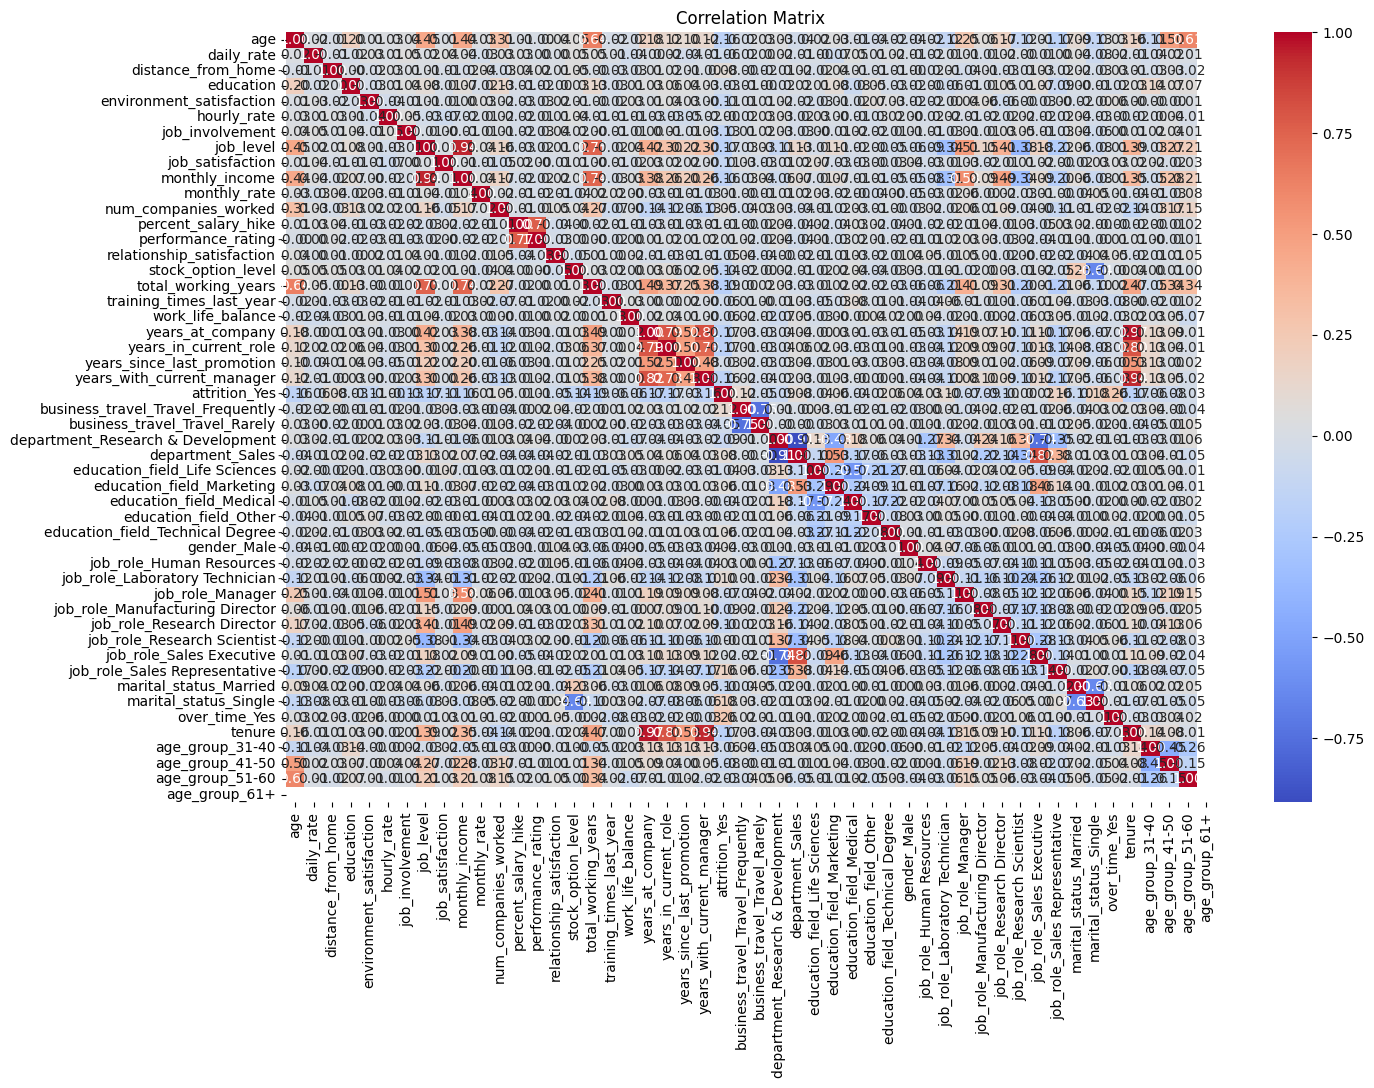

In [24]:
# Correlation matrix
corr_matrix = hr_data_no_outliers.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


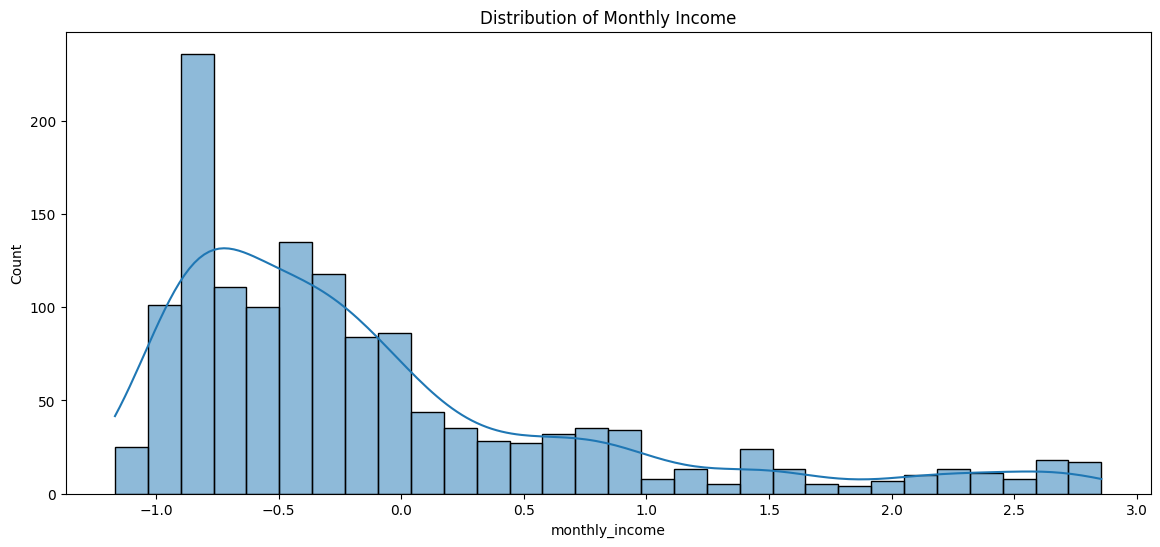

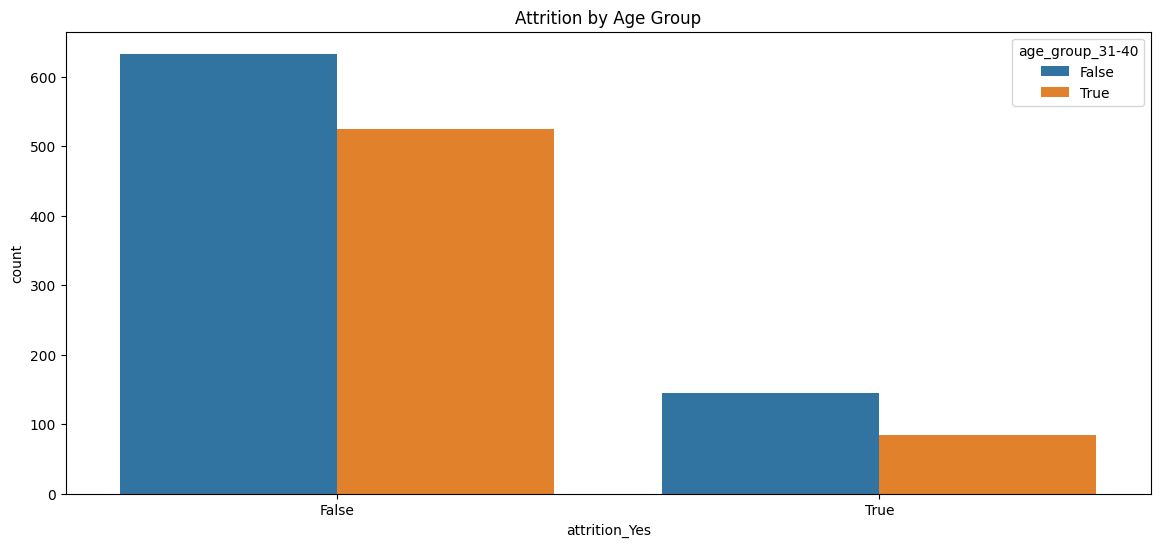

In [26]:
# Step 11: Data Visualization
# Visualizing the distribution of a few numerical features
plt.figure(figsize=(14, 6))
sns.histplot(hr_data_no_outliers['monthly_income'], kde=True, bins=30)
plt.title('Distribution of Monthly Income')
plt.show()

# Visualizing the attrition rate by age group
plt.figure(figsize=(14, 6))
sns.countplot(x='attrition_Yes', hue='age_group_31-40', data=hr_data_no_outliers)
plt.title('Attrition by Age Group')
plt.show()
